**EMOJI** **INSTALLATION**

In [1]:
!pip install emojis

**IMPORTING** **LIBRARIES**

In [2]:
import re
import regex
import pandas as pd
import numpy as np
import emojis
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



**SOURCE CODE FOR DATETIME AND AUTHOR AND MESSAGE**

In [3]:
def date_time(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -'
    result = regex.match(pattern, s)
    if result:
        return True
    return False

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False
def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message        

**SOURCE** **CODE** **FOR** **WHATSAPP** **CHAT** **ANALYSIS**

In [4]:
data = []
conversation = 'sowmya.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

**PANDAS DATAFRAMES**

In [35]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])


**OUTPUT**

In [36]:
print(df.head(31600))

            Date     Time  Author          Message
0     2020-06-16  8:19 PM  Vaishu               Hy
1     2020-06-16  8:21 PM  Vaishu             Mana
2     2020-06-16  8:21 PM  Vaishu            Group
3     2020-06-16  8:21 PM  Vaishu            Loadd
4     2020-06-16  8:21 PM  Vaishu            Chaye
...          ...      ...     ...              ...
31595 2022-04-03  5:09 PM  Vaishu               OK
31596 2022-04-03  5:09 PM  Vaishu    LINK PADATAVA
31597 2022-04-03  5:41 PM  Vaishu  <Media omitted>
31598 2022-04-03  5:41 PM  Vaishu  <Media omitted>
31599 2022-04-03  5:43 PM  Vaishu  <Media omitted>

[31600 rows x 4 columns]


**EMOJIS**

In [37]:


def split_count(text):
  emoji_list=[]
  data=emojis.get(str(text))
  return data

df["Emoji"] = df["Message"].apply(split_count)


In [38]:
image_messages_df = df[df["Message"] == '<‎image omitted>']
message_df=df.drop(image_messages_df.index)
print(image_messages_df)


Empty DataFrame
Columns: [Date, Time, Author, Message, Emoji]
Index: []


In [39]:
video_messages_df = df[df["Message"] == '<‎video omitted>']
message_df=df.drop(video_messages_df.index)
print(video_messages_df)


Empty DataFrame
Columns: [Date, Time, Author, Message, Emoji]
Index: []


In [41]:
gif_messages_df = df[df["Message"] == '<‎GIF omitted>']
message_df=df.drop(gif_messages_df.index)
print(gif_messages_df)

Empty DataFrame
Columns: [Date, Time, Author, Message, Emoji]
Index: []


In [11]:
message_df["Date"] = pd.to_datetime(message_df.Date)


In [12]:
message_df["Time"] = pd.to_datetime(message_df.Time).dt.strftime('%H:%M')

**DATAFRAMES FOR ALL ATTRIBUTES**

In [13]:
message_df.head(31600)

,Date,Time,Author,Message,Emoji
0,2020-06-16,20:19,Vaishu,Hy,{}
1,2020-06-16,20:21,Vaishu,Mana,{}
2,2020-06-16,20:21,Vaishu,Group,{}
3,2020-06-16,20:21,Vaishu,Loadd,{}
4,2020-06-16,20:21,Vaishu,Chaye,{}
...,...,...,...,...,...
31595,2022-04-03,17:09,Vaishu,OK,{}
31596,2022-04-03,17:09,Vaishu,LINK PADATAVA,{}
31597,2022-04-03,17:41,Vaishu,<Media omitted>,{}
31598,2022-04-03,17:41,Vaishu,<Media omitted>,{}


**TOTAL NO OF EMOJIS SENT**

In [42]:
total_emojis_list=list(set([a for b in message_df.Emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)


80


**VISUALIZATION OF EMOJIS**

In [43]:

total_emojis_list = list(set([a for b in message_df.Emoji for a in b]))
total_emojis = len(total_emojis_list)

total_emojis_list = list([a for b in message_df.Emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
for i in emoji_dict:
  print(i)
  
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

('😁', 74)
('😭', 41)
('😍', 22)
('🥺', 22)
('🥳', 17)
('😂', 17)
('♀️', 15)
('😌', 14)
('🤭', 14)
('😆', 14)
('🙄', 14)
('🥰', 11)
('😘', 10)
('❤️', 10)
('😞', 10)
('🙏', 9)
('😃', 9)
('👍', 9)
('🤦', 9)
('😕', 9)
('☺️', 8)
('😊', 7)
('🤫', 7)
('🙆', 7)
('🎉', 7)
('😉', 6)
('😅', 5)
('🤣', 5)
('🤷\u200d♀️', 5)
('😴', 4)
('🤨', 4)
('😒', 4)
('😔', 4)
('😄', 4)
('😡', 4)
('😏', 3)
('🤢', 3)
('😀', 3)
('😮', 3)
('🙆\u200d♀️', 3)
('🙍\u200d♀️', 3)
('🤦\u200d♀️', 3)
('😫', 3)
('😬', 3)
('🙂', 2)
('🤔', 2)
('😳', 2)
('🙍', 2)
('🤕', 2)
('🤮', 2)
('😢', 2)
('😇', 2)
('🤟', 2)
('😟', 2)
('😝', 2)
('😜', 1)
('☹️', 1)
('🌞', 1)
('👌', 1)
('😎', 1)
('\U0001f971', 1)
('😣', 1)
('🥗', 1)
('💥', 1)
('🍇', 1)
('🤩', 1)
('🤞', 1)
('😨', 1)
('🤯', 1)
('🌹', 1)
('🔥', 1)
('🎂', 1)
('😲', 1)
('🤪', 1)
('😠', 1)
('🤥', 1)
('🔖', 1)
('👇', 1)
('🤝', 1)
('😛', 1)


**TOTAL MESSAGES IN THE CHAT**

In [44]:
total_messages = df.shape[0]
print(total_messages)

31621


**TOTAL MEDIA MESSAGES**

In [45]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

3103


**TOTAL LINKS,MESSAGES,MEDIA**

In [46]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between vaishu and sowmya")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of emojis sent:",total_emojis)
print("Number of Links Shared", links)

Chats between vaishu and sowmya
Total Messages:  31621
Number of Media Shared:  3103
Number of emojis sent: 80
Number of Links Shared 144


In [19]:
media_messages_df = df[df['Message'] == '<Media omitted>']



In [20]:
messages_df = df.drop(media_messages_df.index)

**LETTER,WORD,MESSAGE COUNT**

In [21]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

**PANDAS DATAFRAMES FOR ALL ATTRIBUTES**

In [22]:
messages_df.head(31600)

,Date,Time,Author,Message,Emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,2020-06-16,8:19 PM,Vaishu,Hy,{},0,2,1,1
1,2020-06-16,8:21 PM,Vaishu,Mana,{},0,4,1,1
2,2020-06-16,8:21 PM,Vaishu,Group,{},0,5,1,1
3,2020-06-16,8:21 PM,Vaishu,Loadd,{},0,5,1,1
4,2020-06-16,8:21 PM,Vaishu,Chaye,{},0,5,1,1
...,...,...,...,...,...,...,...,...,...
31616,2022-04-04,11:19 AM,Vaishu,bro,{},0,3,1,1
31617,2022-04-04,11:19 AM,Vaishu,evala ralenu,{},0,12,2,1
31618,2022-04-04,11:19 AM,Vaishu,wednesday,{},0,9,1,1
31619,2022-04-04,11:19 AM,Vaishu,vasta,{},0,5,1,1


**ATTRIBUTES**

In [47]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28518 entries, 0 to 31620
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          28518 non-null  datetime64[ns]
 1   Time          28518 non-null  object        
 2   Author        28361 non-null  object        
 3   Message       28518 non-null  object        
 4   Emoji         28518 non-null  object        
 5   urlcount      28518 non-null  int64         
 6   Letter_Count  28518 non-null  int64         
 7   Word_Count    28518 non-null  int64         
 8   MessageCount  28518 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 2.2+ MB


**CONVERTING DATA TO EXCEL FILE**

In [24]:
df.to_csv('chat.csv')

**CHAT ANALYSIS IN WEEKDAYS**

In [48]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)
print(day_df)

            Message day_of_date  messagecount
0                Hy     Tuesday             1
1              Mana     Tuesday             1
2             Group     Tuesday             1
3             Loadd     Tuesday             1
4             Chaye     Tuesday             1
...             ...         ...           ...
31616           bro      Monday             1
31617  evala ralenu      Monday             1
31618     wednesday      Monday             1
31619         vasta      Monday             1
31620  join avutava      Monday             1

[28518 rows x 3 columns]


VISUALIZATION OF WEEKDAYS IN POLAR GRAPH

In [49]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

VISUALIZATION OF MESSAGECOUNT IN YEAR IN XAXES GRAPH

In [50]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

**MOST ACTIVE PERSON IN THE CHAT**





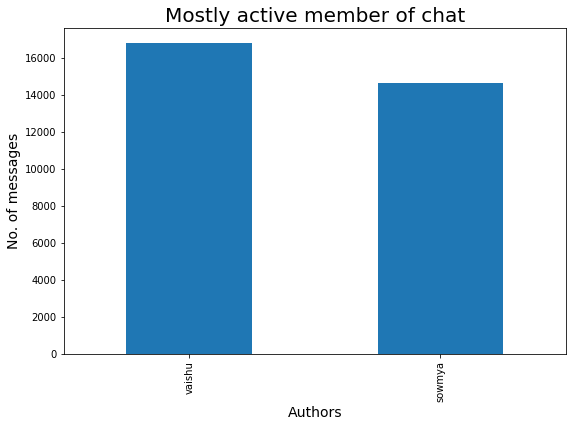

In [28]:
plt.figure(figsize=(9,6))
mostly_active = df['Author'].value_counts() 
m_a = mostly_active.head(2)
bars = ['vaishu','sowmya']
x_pos = np.arange(len(bars))
m_a.plot.bar()
plt.xlabel('Authors',fontdict={'fontsize': 14,'fontweight': 10})
plt.ylabel('No. of messages',fontdict={'fontsize': 14,'fontweight': 10})
plt.title('Mostly active member of chat',fontdict={'fontsize': 20,'fontweight': 8})
plt.xticks(x_pos, bars)
plt.show()


**WORDS USED SO MANY TIMES**

There are 414911 words in all the messages.


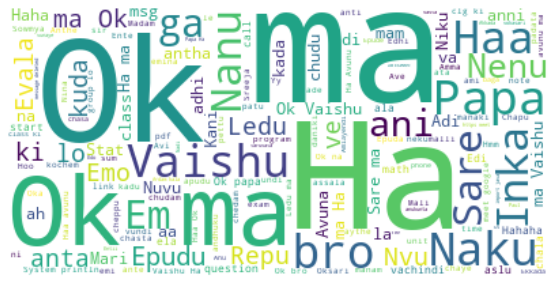

In [29]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**VISUALIZATION OF ACTIVE AUTHOR**

In [30]:
auth = messages_df.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["blue", "green"],
             title="Explicit color sequence"
            )

fig.show()

**AUTHOR INFORMATION**

In [31]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["Vaishu", "Sowmya"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #emojis conists of total emojis
  total_emojis_list=list(set([a for b in message_df.Emoji for a in b]))
  total_emojis = len(total_emojis_list)
  print('total emojis sent',total_emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of Vaishu -
Messages Sent 15060
Average Words per message 2.1632802124833996
Media Messages Sent 1735
total emojis sent 80
Links Sent 5
Stats of Sowmya -
Messages Sent 13300
Average Words per message 2.7369172932330827
Media Messages Sent 1368
total emojis sent 80
Links Sent 8


In [32]:
message_df.head(31600)

,Date,Time,Author,Message,Emoji
0,2020-06-16,20:19,Vaishu,Hy,{}
1,2020-06-16,20:21,Vaishu,Mana,{}
2,2020-06-16,20:21,Vaishu,Group,{}
3,2020-06-16,20:21,Vaishu,Loadd,{}
4,2020-06-16,20:21,Vaishu,Chaye,{}
...,...,...,...,...,...
31595,2022-04-03,17:09,Vaishu,OK,{}
31596,2022-04-03,17:09,Vaishu,LINK PADATAVA,{}
31597,2022-04-03,17:41,Vaishu,<Media omitted>,{}
31598,2022-04-03,17:41,Vaishu,<Media omitted>,{}


In [33]:
messages_df.head(31600)

,Date,Time,Author,Message,Emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,2020-06-16,8:19 PM,Vaishu,Hy,{},0,2,1,1
1,2020-06-16,8:21 PM,Vaishu,Mana,{},0,4,1,1
2,2020-06-16,8:21 PM,Vaishu,Group,{},0,5,1,1
3,2020-06-16,8:21 PM,Vaishu,Loadd,{},0,5,1,1
4,2020-06-16,8:21 PM,Vaishu,Chaye,{},0,5,1,1
...,...,...,...,...,...,...,...,...,...
31616,2022-04-04,11:19 AM,Vaishu,bro,{},0,3,1,1
31617,2022-04-04,11:19 AM,Vaishu,evala ralenu,{},0,12,2,1
31618,2022-04-04,11:19 AM,Vaishu,wednesday,{},0,9,1,1
31619,2022-04-04,11:19 AM,Vaishu,vasta,{},0,5,1,1


In [51]:
df.to_csv('chat.csv')